In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
# Load your trained model
model = load_model("gender.h5")

# Print summary to verify
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,523 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [3]:
# You can change based on your dataset
class_labels = ['Male', 'Female']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


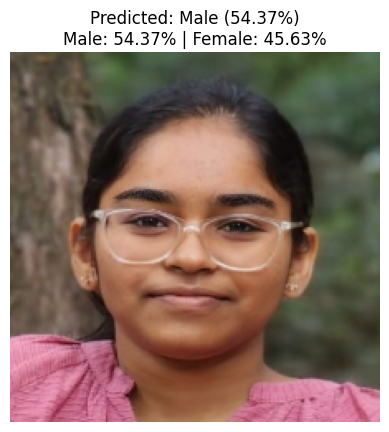

In [4]:
# Path to your test image
img_path = "test4.jpg"   # change to your image

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))   # use same size as training
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # normalize if training used normalization

# Remove flattening step
# img_array = img_array.reshape(1, -1)  # <-- REMOVE THIS LINE

# Predict
prediction = model.predict(img_array)[0]  # Get the first prediction

male_confidence = prediction[0] * 100
female_confidence = (1 - prediction[0]) * 100

if male_confidence > 50:
    predicted_label = "Male"
    predicted_confidence = male_confidence
else:
    predicted_label = "Female"
    predicted_confidence = female_confidence

# Show result
plt.imshow(img)
plt.title(
    f"Predicted: {predicted_label} ({predicted_confidence:.2f}%)\n"
    f"Male: {male_confidence:.2f}% | Female: {female_confidence:.2f}%"
)
plt.axis("off")
plt.show()